# Tutorial Dereck Zoolander para chicos que no saben compilar bien y quieren aprender a hacer otras cosas bien tambien
## (Introduccion a la herramienta GNU Make)

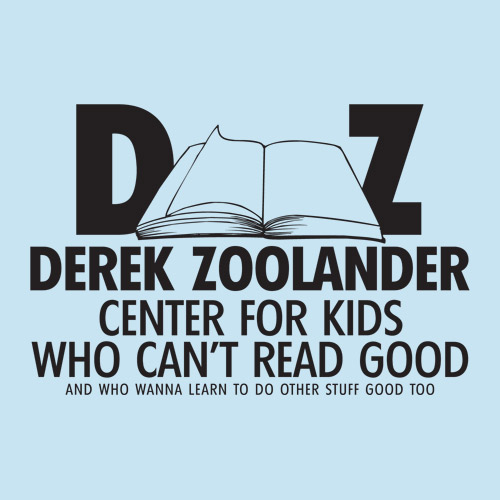

In [1]:
from IPython.display import Image
Image(filename='./dz.jpg')

## ¿Que es Make?

`make` es una herramienta pensada para automatizar la compilacion de programas escritos en `C`/`C++`. Compilar no siempre es un proceso que se pueda realizar a mano, por ello surgen estas herramientas. Algunas herramientas similares para otros lenguajes son: `Ant`, `Cmake` ,`Gradle` o `Grunt`.

`make` no hace magia, sino que realiza el proceso mediante las instrucciones definidas en el archivo `Makefile`. En el mismo, definimos que y como hacer cada parte del proceso.

## Parte 1: Lo basico

## Estructura de un Makefile

Los archivos `Makefile` definen las instrucciones a ejecutar en el proceso de compilacion (mas adelante veremos que es mas que eso). Cada instruccion es de la forma:
```make
target: dependencias
    comando/s
```

* ```Target```: Son los distintos pasos/acciones que podemos realizar. Cada nombre es unico.
* ```Dependencias```: Son los requisitos que se deben cumplir cada target antes de poder ser ejecutado. Pueden ser tanto `targets` como archivos.
* ```Comandos```: Son los pasos a ejecutar en el target definido

### Ejemplo 1 (Makefile basico)

In [1]:
cp ./makefile_ej1 makefile
cat makefile

compile:
	gcc -std=c99 example.c -o example


En nuestro ejemplo:
* ```Target```: _compile_
* ```Dependencias```: no tiene
* ```Comando```: ```gcc -std=c99 example.c -o example```

#### Todo muy lindo pero ¿Como uso eso?

Para ejecutar un target de nuestro makefile, se debe llamar al comando `make` indicandole que target se quiere ejecutar. Por ejemplo:

In [2]:
make compile

gcc -std=c99 example.c -o example
/tmp/ccYJvt5F.o: In function `main':
example.c:(.text+0xa): undefined reference to `greet'
collect2: error: ld returned 1 exit status
makefile:2: recipe for target 'compile' failed
make: *** [compile] Error 1


Si se ejecuta `make` sin ningun target especificado, se ejecutara el primer target que se encuentre en el archivo. En nuestro caso el unico es `compile` entonces:

In [3]:
make

gcc -std=c99 example.c -o example
/tmp/ccrzYKM0.o: In function `main':
example.c:(.text+0xa): undefined reference to `greet'
collect2: error: ld returned 1 exit status
makefile:2: recipe for target 'compile' failed
make: *** [compile] Error 1


Al ejecutar `make` busca en el directorio un archivo con el nombre `makefile` o `Makefile` para ejecutar. Si nuestro archivo `Makefile` tiene un nombre diferente (vaya uno a saber por que), se puede indicar el nombre del mismo con el parametro `-f`

In [4]:
make -f ./makefile_ej1 compile

gcc -std=c99 example.c -o example
/tmp/ccvndiqU.o: In function `main':
example.c:(.text+0xa): undefined reference to `greet'
collect2: error: ld returned 1 exit status
makefile_ej1:2: recipe for target 'compile' failed
make: *** [compile] Error 1


## Dependencias

Las dependencias pueden ser de dos tipos:
* Dependencias de `targets`: Los `targets` deben ejecutarse antes de que se ejecute este `target`
* Dependencias de `archivos`: Los `archivos` deben existir el archivo para que se ejecute el `target`. Ademas, desde la ultima vez que se ejecuto el target el archivo se debe haber modificado.

### Ejemplo 2 (Dependencias de targets)

In [5]:
cp ./makefile_ej2 makefile
cat makefile

foo:
	echo "Fooooo"

bar: foo
	echo "Baaaar"


In [6]:
make

echo "Fooooo"
Fooooo


Si no queremos ver que comandos se ejecutan, se puede usar el parametro `-s`

In [7]:
make -s

Fooooo


In [8]:
make bar -s

Fooooo
Baaaar


Como `bar` depende de `foo`, al ejecutar `bar` este target primero intenta ejecutar `foo`

### Ejemplo 3 (Dependencias de archivos)

In [9]:
rm -f *.txt
touch text_support.txt
cp ./makefile_ej3 makefile
cat makefile

text.txt: text_support.txt 
	echo "Hello world" > ./text.txt

doSomething: text.txt
	cat text.txt


In [10]:
make doSomething

echo "Hello world" > ./text.txt
cat text.txt
Hello world


In [11]:
make doSomething

cat text.txt
Hello world


Si bien `doSomething` depende de text.txt, text.txt depende del archivo _text_support.txt_ . Como en el segundo llamado este archivo no se modifica, el target de construccion `text.txt` no se ejecuta.

In [12]:
echo "Bye bye world" > text_support.txt

In [13]:
make doSomething

echo "Hello world" > ./text.txt
cat text.txt
Hello world


Si modifico `text_support.txt` el target vuelve a ejecutarse nuevamente. Esto es util cuando compilamos TDAs dentro de nuestros programas, y no volver a compilar el TDA si los fuentes no fueron modificados

## Algunos targets tipicos
### all

El target all se suele utilizar para determinar el target por defecto del `Makefile`. Se usa de la forma;
```make
all: <target1> <target2> <target3> ... <target n>
```
Donde en las dependencias se ponen todos los targets que se espera se ejecuten al invocar `make`

### clean

El target clean se suele utilizar para limpiar los archivos intermedios que se generan durante la compilacion:
```make
clean:
    rm -f <to_clean1> <to_clean2> <to_clean3> ... <to_clean n>
```
Es a veces una buena idea tener 2 `targets` distintos para limpiar archivos intermedios y otro para limpiar todo lo que no sea un archivo de codigo fuente.

### run

El target run se suele utilizar para ejecutar el programa principal.
```make
run: executable
    ./executable
```

### Ejemplo 4 (Makefile un poco mas completo)

In [14]:
cp ./makefile_ej4 makefile
cat makefile

all: english_example

english_greeter.o: english_greeter.c greeter.h
	gcc -std=c99 english_greeter.c -c 

spanish_greeter.o: spanish_greeter.c greeter.h
	gcc -std=c99 spanish_greeter.c -c 

english_example: english_greeter.o example.c
	gcc -std=c99 example.c english_greeter.o -o e_example

spanish_example: spanish_greeter.o example.c
	gcc -std=c99 example.c spanish_greeter.o -o s_example

run: spanish_example
	./s_example

clean_obj:
	rm -f *.o 

clean: clean_obj
	rm -f e_example s_example





In [15]:
make

make: Nothing to be done for 'all'.


In [16]:
make run

./s_example
make: ./s_example: Command not found
makefile:16: recipe for target 'run' failed
make: *** [run] Error 127


In [17]:
./e_example

bash: ./e_example: No such file or directory


In [18]:
make clean

rm -f *.o 
rm -f e_example s_example


In [19]:
./e_example

bash: ./e_example: No such file or directory


## Resumen
### ¿Como escribir un makefile?

* Paso uno: Pensar que tiene que ejecutar
* Paso dos: Escribirlo
* Paso tres: #Profit

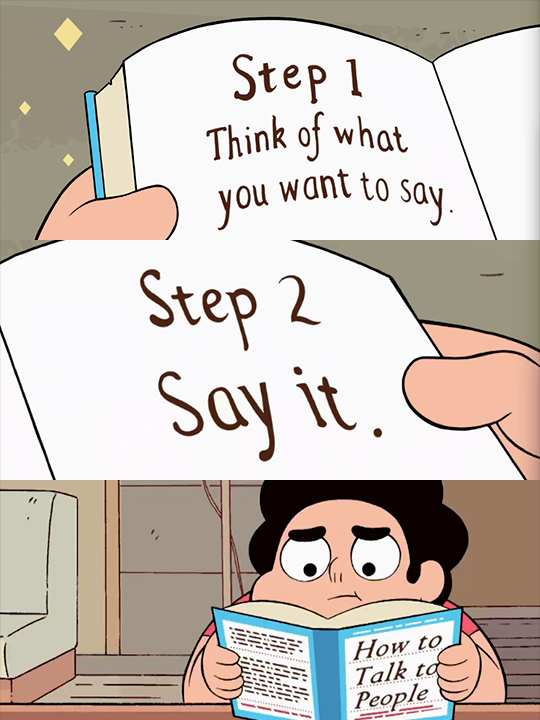

In [2]:
from IPython.display import Image
Image(filename='./su.png')

## Parte 2: Escribiendo Makefiles decentes (Magia negra, tips and tricks)

### Variables
Una parte importante de la vida es recordar que cualquier cosa ejecutable es codigo, y como tal, puede cambiar muy rapido. Entonces, es una muy buena idea que se pueda cambiar facilmente. Los makefiles permiten definir variables, y en general se suelen usar las siguientes (los nombres son por convencion):

* __CC__: Para definir el compilador a usar
* __C_FLAGS__: Para definir los flags del compilador
* __C_LDFLAGS__: Para definir los flags del linker
* __EXEC__: Nombre del ejecutable a generar
* __OBJ__: Lista de todos los codigos objetos a generar

Para utilizar el contenido de la variable se utiliza `$(<variable>)`

### Ejemplo 5 (Makefile con variables)

In [20]:
cp ./makefile_ej5 makefile
cat makefile

CC = gcc

C_FLAGS = -std=c99 -Wall -Wextra -pedantic
C_LDFLAGS =

ENG_OBJ = english_greeter.o
ESP_OBJ = spanish_greeter.o

ENG_EXEC = english_example
ESP_EXEC = spanish_example

DEFAULT = spanish_example

all: $(DEFAULT)

english_greeter.o: english_greeter.c greeter.h
	$(CC) $(C_FLAGS) english_greeter.c -c

spanish_greeter.o: spanish_greeter.c greeter.h
	$(CC) $(C_FLAGS) spanish_greeter.c -c

$(ENG_EXEC): $(ENG_OBJ) example.c
	$(CC) $(C_FLAGS) example.c $(ENG_OBJ) -o $(ENG_EXEC)

$(ESP_EXEC): $(ESP_OBJ) example.c
	$(CC) $(C_FLAGS) example.c $(ESP_OBJ) -o $(ESP_EXEC)

run: $(DEFAULT)
	./$(DEFAULT)

clean_obj:
	rm -f *.o

clean: clean_obj
	rm -f $(ENG_EXEC) $(ESP_EXEC)


In [21]:
make run

gcc -std=c99 -Wall -Wextra -pedantic spanish_greeter.c -c
gcc -std=c99 -Wall -Wextra -pedantic example.c spanish_greeter.o -o spanish_example
./spanish_example
Hola Richard


**Puedo tambien cambiarle el valor a las variables o definirlas al momento de llamar a make**

In [22]:
make run DEFAULT=english_example

gcc -std=c99 -Wall -Wextra -pedantic english_greeter.c -c
gcc -std=c99 -Wall -Wextra -pedantic example.c english_greeter.o -o english_example
./english_example
Hello Richard


Las variables se pueden utilizar en cualquier parte del codigo, y obtener resultados mas complejos como por ejemplo:
```make
$(LIB).o: $(LIB).c $(LIB).h
    $(CC) $(C_FLAGS) $(LIB).c -c
```
Esto nos permitiria elegir que biblioteca compilar. Este y otros trucos con variables ya son mas avanzados y tienen usos mas especificos, asi que por ahora son solo una mencion.

### REGEXP

Los `Makefile` soportan expresiones regulares para poder generalizar los targets. En lo personal, si bien simplifican el trabajo a la hora de escribir un `Makefile`, usar este tipo de cosas no es una muy buena practica ya que usualmente se termina usando mal. Los problemas asociados son la falta de legibilidad y la perdida de control sobre el proceso completo de compilacion. Queda a cargo del lector interiorizarse mas sobre esto si es que le interesa.

### Valgrind

Como ya se mostro, los targets pueden ejecutar casi cualquier linea de bash. Es entonces una buena idea crear un target que nos permita correr **Valgrind** sin tener que estar recordando todos esos largos comandos. Un snipet util para ello seria:

```make
VALGRIND = valgrind
V_FLAGS = --track-origins=yes --leak-check=full --trace-children
VALGRIND_V = $(VALGRIND) $(V_FLAGS) -v
VALGRIND_Q = $(VALGRIND) $(V_FLAGS) -q

valgrindRun: $(EXEC)
    $(VALGRIND_V) ./$(EXEC)
```

### Comentarios

Dentro de los archivos Makefile se pueden hacer comentarios inline utilizando '#'. Son muy utiles a la hora de por ejemplo determinar el objetivo de una variable

### Magia negra: El snipet para las entregas

```make
PADRON=XXXXX
ARCHIVOS=*.h *.c #Tipos de archivos que se van a agregar
CUATRIMESTRE=2016-2C
ENTREGA=Pila
ENCODING=ISO-8859-1
OUTPUTFILE=out.ps #archivo intermedio
FORMATO=landscape #portrait o landscape (vertical u horizontal)
COLUMNAS=2 #paginas por hoja (en columnas)
NUMEROS_LINEA=1 #cada cuantas lineas se imprime el numero de linea
ARCHIVO_ENTREGA=$(PADRON)-$(ENTREGA)
NOMBRE_ZIP= $(ARCHIVO_ENTREGA).zip
NOMBRE_PDF= $(ARCHIVO_ENTREGA).pdf
ENCABEZADO = "[75.41] Algoritmos y Programacion II"
PIE = "Padrón $(PADRON) (curso $(CUATRIMESTRE)) Entrega: $(ENTREGA)"
 
 
pdf: clean
        a2ps $(ARCHIVOS) -Av --header=$(ENCABEZADO) --footer=$(PIE) --line-numbers=$(NUMEROS_LINEA) --borders=yes --columns=$(COLUMNAS)  --$(FORMATO) --output=$(OUTPUTFILE) --encoding=$(ENCODING) --tabsize=4 --major=columns --toc  | ps2pdf $(OUTPUTFILE) $(NOMBRE_PDF)
        rm *.ps #elimino los archivos temporales
 
entrega: pdf
        zip $(NOMBRE_ZIP) $(ARCHIVOS) *.pdf
 
clean_entrega: clean
        rm *.zip *.pdf
```

Este snippet permite generar un zip con el codigo para entregar y ademas genera un pdf con el codigo listo para imprimir (Si, monoespaciado y con numeros de linea).

### Ejemplo 6 (Makefile de las entregas)

In [1]:
cp ./makefile_ex makefile
cat makefile

PADRON=XXXXX
ARCHIVOS=*.h *.c #Tipos de archivos que se van a agregar
CUATRIMESTRE=2013-2C
ENTREGA=Pila
ENCODING=ISO-8859-1
OUTPUTFILE=out.ps #archivo intermedio
FORMATO=landscape #portrait o landscape (vertical u horizontal)
COLUMNAS=2 #paginas por hoja (en columnas)
NUMEROS_LINEA=1 #cada cuantas lineas se imprime el numero de linea
ARCHIVO_ENTREGA=$(PADRON)-$(ENTREGA)
NOMBRE_ZIP= $(ARCHIVO_ENTREGA).zip
NOMBRE_PDF= $(ARCHIVO_ENTREGA).pdf
ENCABEZADO = "[75.41] Algoritmos y Programacion II"
PIE = "Padrón $(PADRON) (curso $(CUATRIMESTRE)) Entrega: $(ENTREGA)"

all: english_example


english_greeter.o: english_greeter.c greeter.h
	gcc -std=c99 english_greeter.c -c

spanish_greeter.o: spanish_greeter.c greeter.h
	gcc -std=c99 spanish_greeter.c -c

english_example: english_greeter.o example.c
	gcc -std=c99 example.c english_greeter.o -o e_example

spanish_example: spanish_greeter.o example.c
	gcc -std=c99 example.c spanish_greeter.o -o s_example

run: spanish_example
	./s_example

clean_obj

In [2]:
make entrega

rm -f *.o
rm -f e_example s_example
a2ps *.h *.c  -Av --header="[75.41] Algoritmos y Programacion II" --footer="Padrón XXXXX (curso 2013-2C) Entrega: Pila" --line-numbers=1  --borders=yes --columns=2   --landscape  --output=out.ps  --encoding=ISO-8859-1 --tabsize=4 --major=columns --toc  | ps2pdf out.ps  XXXXX-Pila.pdf
/bin/sh: 1: a2ps: not found
/bin/sh: 1: ps2pdf: not found
makefile:41: recipe for target 'pdf' failed
make: *** [pdf] Error 127


Para poder utilizarlo es necesario tener los paquetes: `a2ps` , `ps2pdf` y `zip`. Siempre se pueden instalar haciendo:
```bash
sudo apt-get update && sudo apt-get install a2ps ps2pdf zip
```

**DISCLAIMER: Los targets dependen de las instrucciones de clean ya definidas. Si alguien define clean como `rm *` no nos responsabilizamos**

## Resumen

Los build scripts como los Makefile ahorran tiempo. Permiten que cualquiera pueda compilar un codigo de manera sencilla y sin tener que estar escribiendo N comandos en orden. Incluso, este tipo de archivos permiten que nuestro codigo se compile y pruebe automaticamente mientras usamos control de versiones:

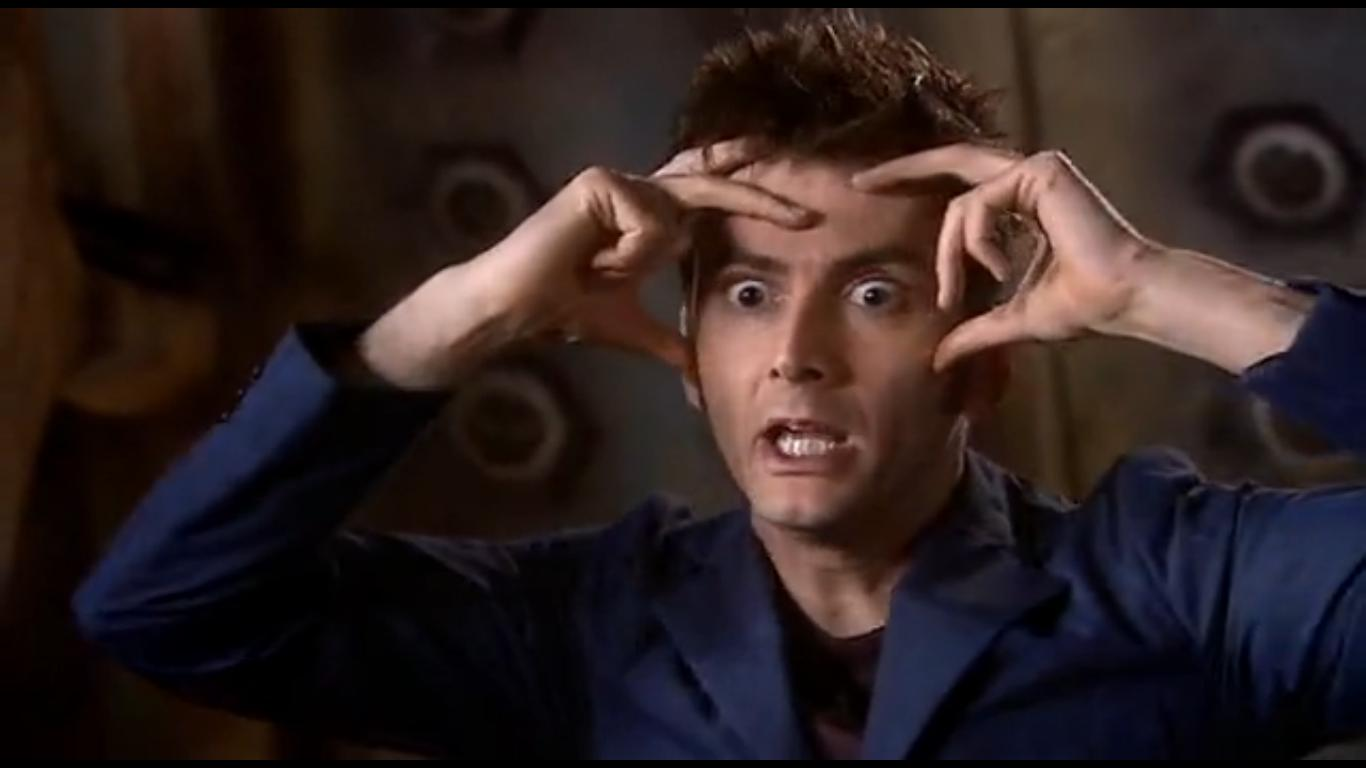

In [1]:
from IPython.display import Image
Image(filename='./end.jpg')

Para mas informacion, siga en contacto

**The End**